# 1. 数据表示

In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


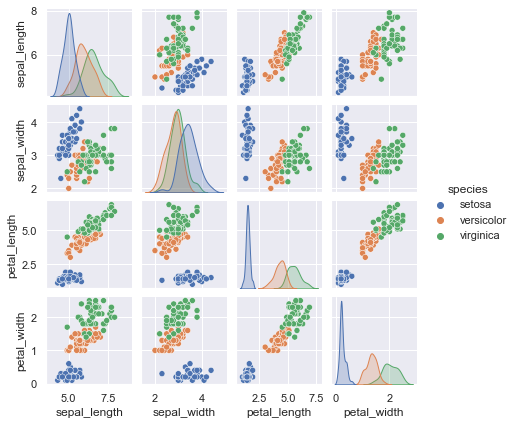

In [2]:
import seaborn as sns

sns.set()
sns.pairplot(iris, hue='species', height=1.5)

In [3]:
# 抽取特征矩阵
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
# 抽取标签
y_iris = iris['species']
y_iris.shape

(150,)

# 2. 评估器API

## 2.1. 有监督学习

### 简单线性回归示例

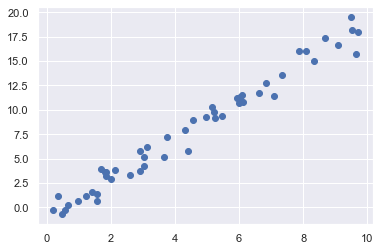

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [7]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [8]:
model.fit(X, y)

LinearRegression()

In [9]:
# 斜率
model.coef_

array([1.9776566])

In [10]:
# 截距
model.intercept_

-0.9033107255311164

In [11]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

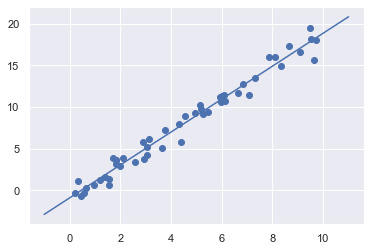

In [12]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

### 鸢尾花数据分类

In [13]:
from sklearn.model_selection import train_test_split

# 分割训练集和测试集
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [14]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
ymodel = model.predict(Xtest)

In [15]:
from sklearn.metrics import accuracy_score

# 准确率
accuracy_score(ytest, ymodel)

0.9736842105263158

## 2.2. 无监督学习

### 鸢尾花数据降维

In [16]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

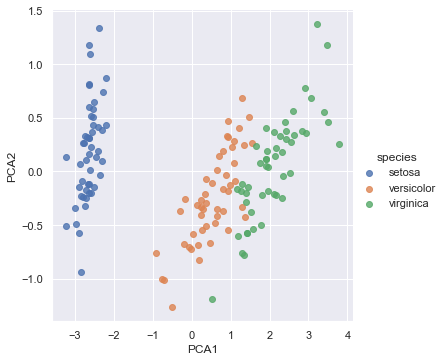

In [17]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot(x='PCA1', y='PCA2', hue='species', data=iris, fit_reg=False)

### 鸢尾花数据聚类

In [18]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

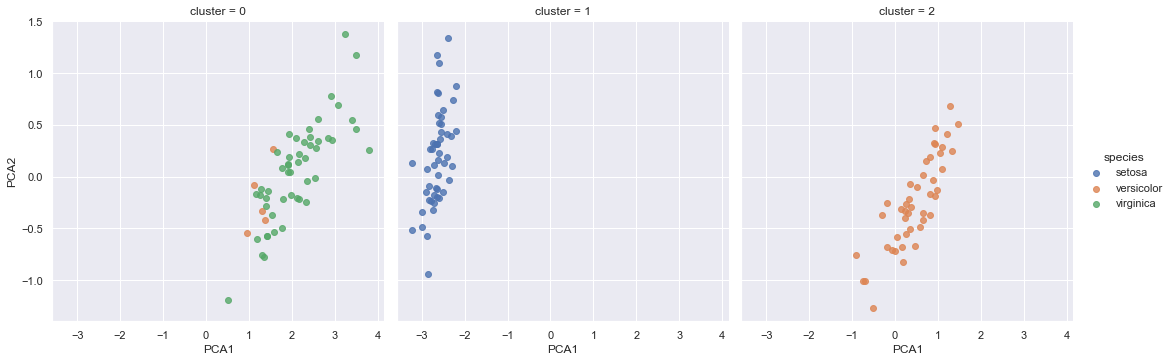

In [19]:
iris['cluster'] = y_gmm
sns.lmplot(x='PCA1', y='PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

# 3. 实例

In [20]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

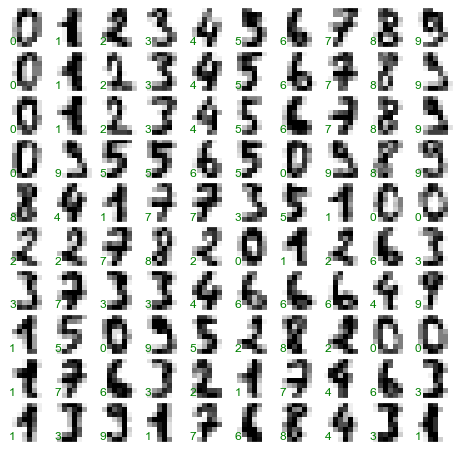

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [22]:
X = digits.data
y = digits.target

In [23]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

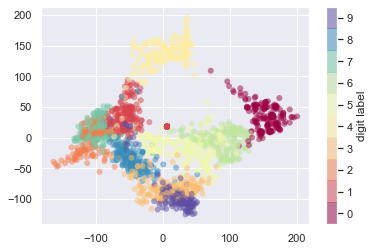

In [24]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [26]:
accuracy_score(ytest, y_model)

0.8333333333333334

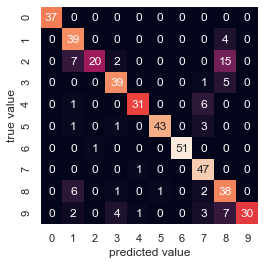

In [27]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

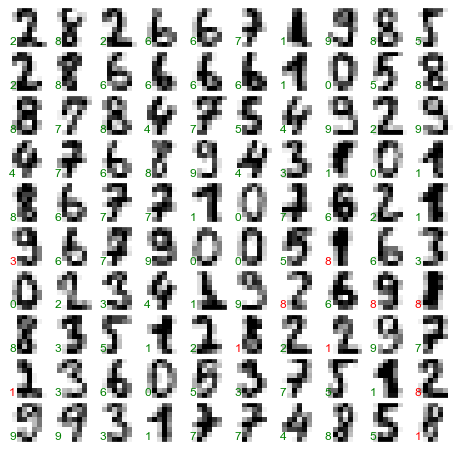

In [28]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')